In [2]:
import pandas as pd

file_path = '/content/embeddingsdata.xlsx'
data = pd.read_excel(file_path)

data.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0


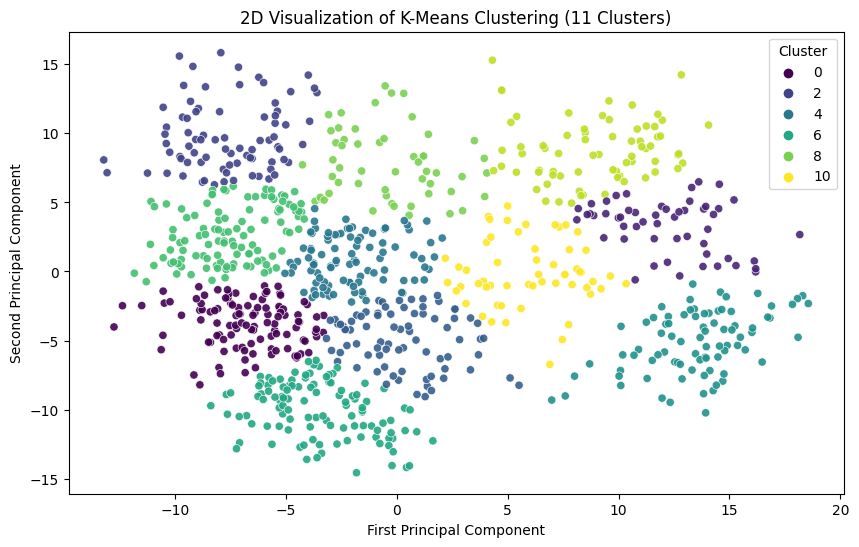

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying PCA for clustering
pca_370 = PCA(n_components=2)
data_pca_370 = pca_370.fit_transform(data_scaled)

# Applying K-means clustering
kmeans = KMeans(n_clusters=11, n_init=10)
clusters = kmeans.fit_predict(data_pca_370)

# Applying PCA again but only for 2 components
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_scaled)

# Preparing DataFrame for 2D seaborn plot
plot_data = pd.DataFrame(data_pca_2, columns=['PCA_1', 'PCA_2'])
plot_data['Cluster'] = clusters  # Use the cluster labels from the 370-component clustering

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', alpha=0.9)
plt.title('2D Visualization of K-Means Clustering (11 Clusters)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

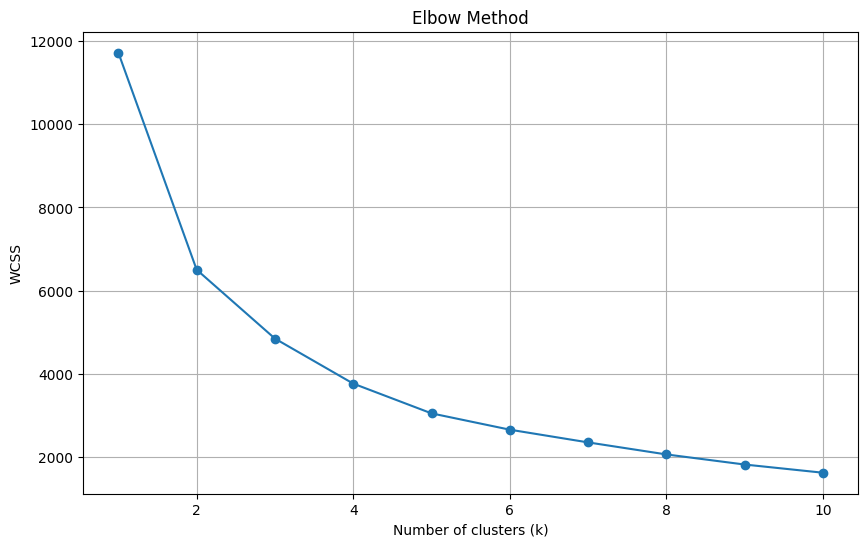

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

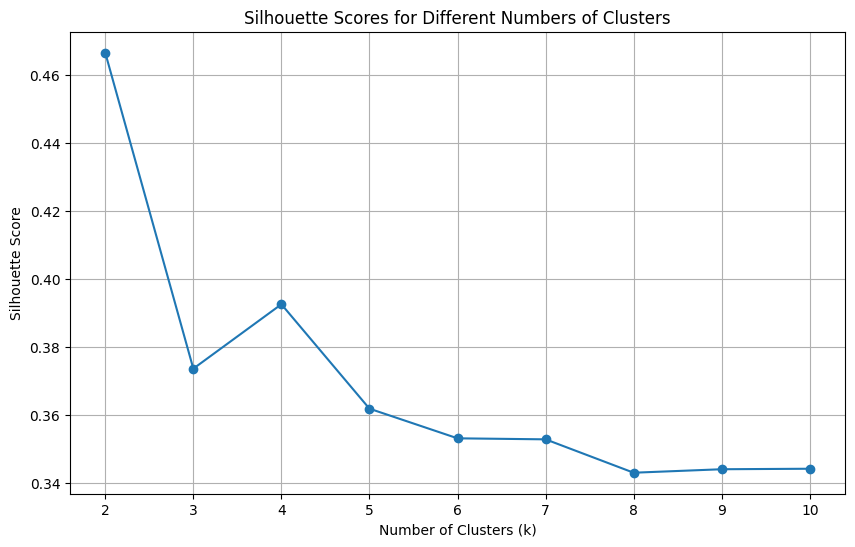

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



# Finding the optimal k using the Elbow Method
wcss = []
for i in range(1, 11):  # Testing k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plotting WCSS to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Calculating silhouette scores for different values of k
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, clusters)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


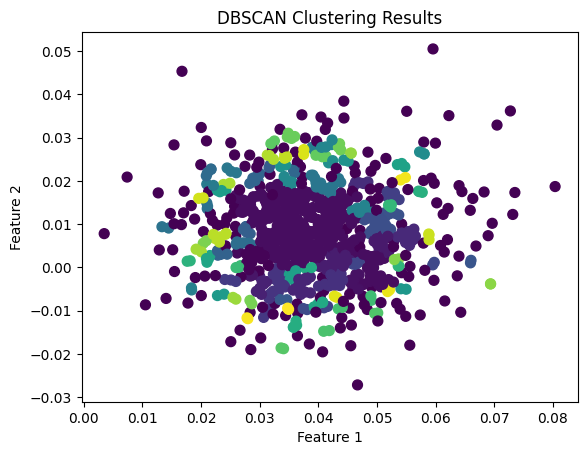

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = data[['embed_10', 'embed_26']].values  # Adjust column names as per your dataset

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Function to perform DBSCAN clustering
def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# Set the parameters for DBSCAN
eps = 0.11 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2 # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
cluster_labels = dbscan_clustering(X_standardized, eps, min_samples)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


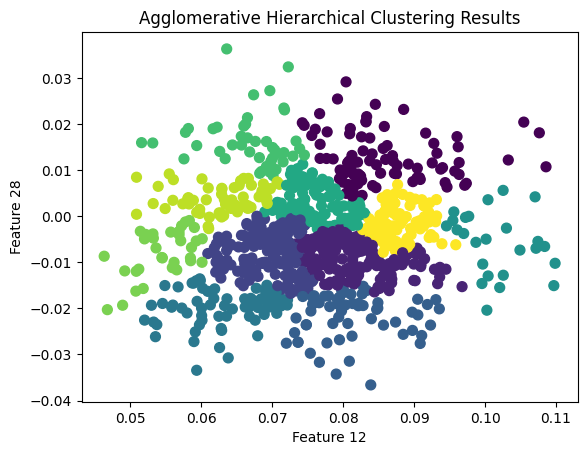

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = data.iloc[:, 1:].values  # Adjust the column indices as per your dataset

# Choose the two features you want to use for clustering
feature1_index = 11  # Replace with the actual index of your first feature
feature2_index = 27 # Replace with the actual index of your second feature
X_2d = X[:, [feature1_index, feature2_index]]

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_2d)

# Set the number of clusters
n_clusters = 11  # Adjust as needed

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X_standardized)

# Visualize the clustering results
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Hierarchical Clustering Results')
plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.show()


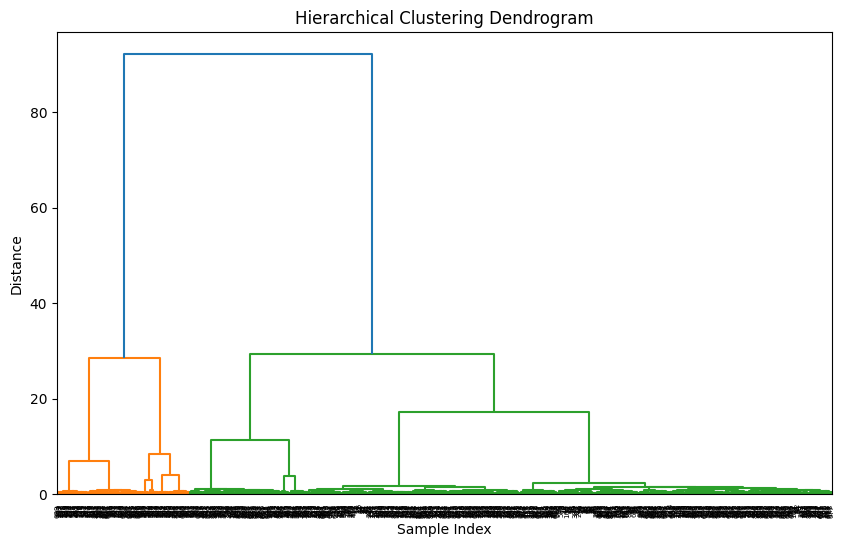

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


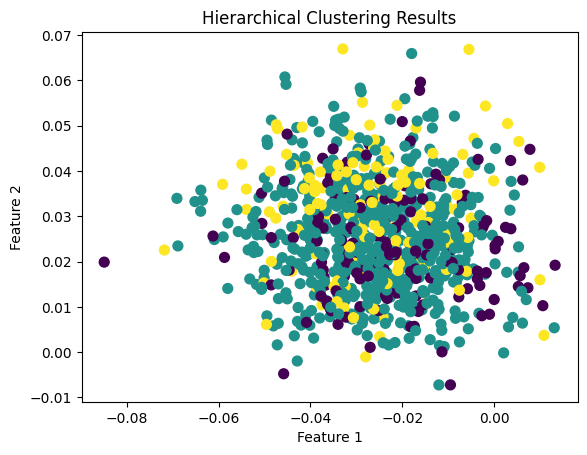

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
features = data.iloc[:, 1:].values  # Adjust the column indices as per your dataset

# Hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can choose a different method as well

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
n_clusters = 3  # Choose the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(features)

# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  label  
0   0.017894   0.045380   0.01850

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

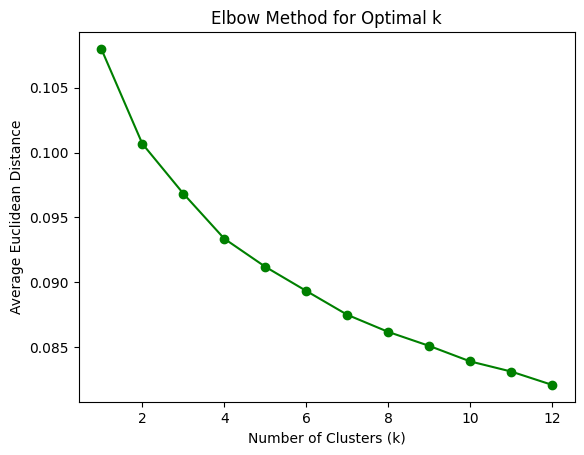

In [19]:
# Elbow method is used to find the optimal k value for a given cluster. The value of k choosen should be such that the distances when measured shouldn't be very large.
# The distances can be calculated in many different ways that includes euclidean and WCSS.
# On plotting the graph for various values of k the point on graph where the elbow or the curve noticed will be the required value of k to be choosen.
# it is not preferred to merge the train and test sets of the dataset as it avoids the performance of the model based on unseen data. Also result in data leakage, overfittng, etc.
# removing the class label from the dataset will make it an unnsupervised model to work with.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
X = data.iloc[:, :-1]  #Features
y = data.iloc[:, -1]    #target data

# to obtain train and test set with features X and labels y
XTrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size= 0.2, random_state = 42)

# to merge the train and test set by concatenating X and y separately
mergedX = pd.concat([XTrain, Xtest], axis = 0)
mergedy = pd.concat([yTrain, yTest], axis = 0)

mergedData = pd.DataFrame(data=np.c_[mergedX, mergedy], columns=list(X.columns) + ['label'])    #to obtain the 2-D array where mergedX becomes the first of columns and mergedy becomes the last column

# reset the index of the merged DataFrame
mergedData.reset_index(drop=True, inplace=True)

# Display the merged dataset
print(mergedData.head())
# to remove the class label

mergedDataWithoutLabels = mergedData.drop('label' , axis = 1)

print(mergedDataWithoutLabels.head())
# Define a range of k values
kValues = list(range(1, 13))

# Calculate the average Euclidean distance for each k
averageDistances = []
# for K - means clustering the dataset with no label to be used as this is an unsupervised model

# K - Means model with k=3
kMeans = KMeans(n_clusters=3, random_state=42)  # smaller value of K to create small clusters with larger number of clusters. This leads to over-generation.
                                                # when K is large, the algorithm produces a higher number of smaller clusters. This can lead to under-generalization.
                                                # in over-generation distinct patterns or groups within the data aren't identified.
                                                # under-generalization the algorithm identifies granular clusters that may not reflect the underlying structure of the data.
# Fit the model to your data
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Add the cluster labels to the DataFrame
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels

# Display the DataFrame with cluster labels
print(df_clusters.head())
for k in kValues:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(mergedDataWithoutLabels)
    # "kmeans.inertia_" performs the sum of squared of distances(euclidean distance) and when divided by the length of "mergedDataWithoutLabels" the average distance can be obtained
    averageDistances.append(kmeans.inertia_ / len(mergedDataWithoutLabels))

# Plot the elbow curve
plt.plot(kValues, averageDistances, marker='o', color='green')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2379938154632435


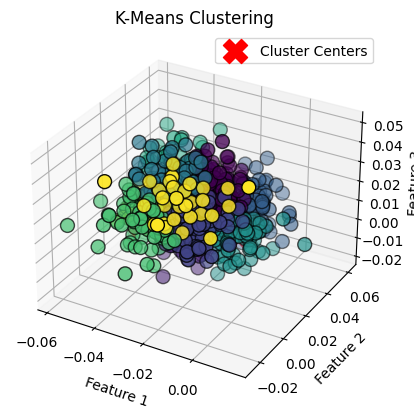

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing for 3D plotting
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.xlsx' with the path to your Excel file
excel_file_path = '/content/embeddingsdata.xlsx'

# Load the dataset from Excel
df = pd.read_excel(excel_file_path)

# Extract three features
features = df[['embed_110', 'embed_261', 'embed_451']].values  # Replace 'embed_XXX' with the third feature name

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=300, label='Cluster Centers')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.legend()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.xlsx' with the path to your Excel file
excel_file_path = '/content/embeddingsdata.xlsx'

# Load the dataset from Excel
df = pd.read_excel(excel_file_path)

# Extract features (assuming you have two features for simplicity)
features = df[['embed_10', 'embed_26']].values

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3307784891428939


     Cluster
0          0
1          0
2          0
3          0
4          0
..       ...
895        0
896        0
897        0
898        0
899        0

[900 rows x 1 columns]


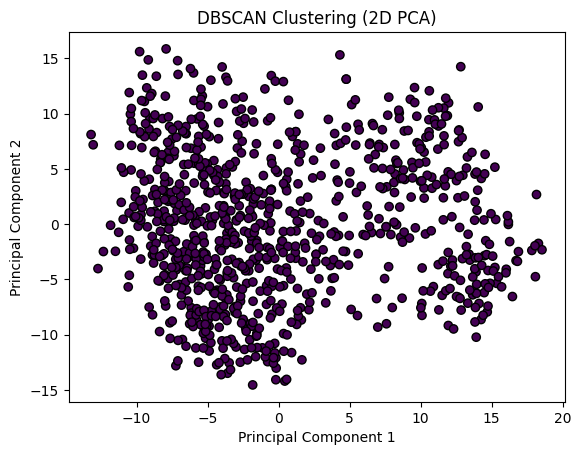

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'mergedDataWithoutLabels' is your dataset
features = mergedDataWithoutLabels

# Standardize the data
features_standardized = StandardScaler().fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=300, min_samples=769)
labels = dbscan.fit_predict(features_standardized)

# Add cluster labels to the dataframe
mergedDataWithoutLabels['Cluster'] = labels

# Display the resulting dataframe with cluster labels
print(mergedDataWithoutLabels[['Cluster']])

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_standardized)

# Create a scatter plot
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
